Import necessary packages.

In [1]:
# import all functions from python labrary: sympy
from sympy import *
# import python library: matplotlib (for nice plots)
import matplotlib
# set sympy output to print pretty math expressions
init_printing()

Declare variables we are going to use as 'symbols'. We will add more along the way.

In [2]:
L, K, w, r = symbols('L K w r')

# 1.1. Cobb-Douglas (CD) Production Function

## Define a production function

Define a CD production function:

In [3]:
alpha, beta = symbols('alpha beta')
# Note: in sympy syntax: use double star ** for power
q = L**(alpha) * K**(beta)
# show the defined function
q

Calculate marginal product of labor

In [4]:
# Note: in sympy 
mpl = q.diff(L)
mpl.simplify()

In [5]:
mpk = q.diff(K)
mpk.simplify()

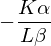

In [6]:
mrts = simplify(-mpl / mpk)
mrts

## Visualize the production function in 3D

In [4]:
# import plot3d function from sympy
from sympy.plotting import plot3d
# enable package matplotlib, and its notebook model to display the plot in a plot window 
# (allowing rotation of the 3d plot) 
%matplotlib notebook
import matplotlib.pyplot as plt

In [5]:
# set production parameters for plotting
qplot = q.subs([(alpha, 1/2), (beta, 1/2)])
qplot

<IPython.core.display.Javascript object>


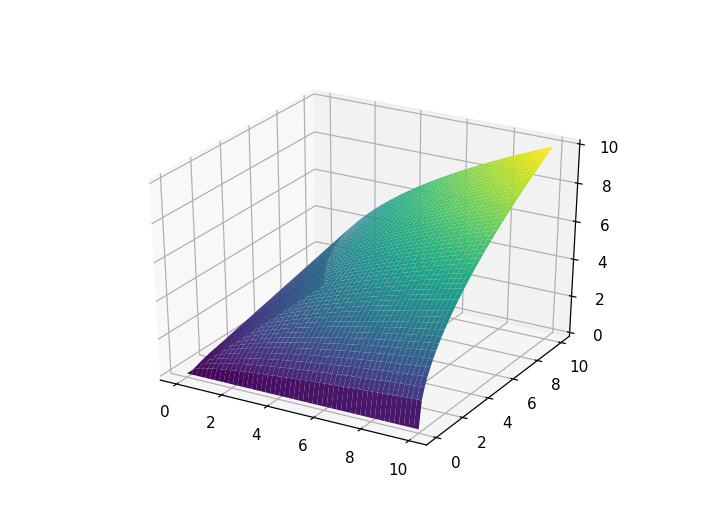

In [6]:
plot3d(qplot, (L,0,10), (K,0,10))

Plot the isoquant curve that has output level of 5

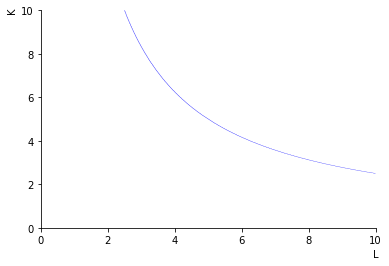

In [8]:
# set matplotlib to inline model for faster display (don't need the interactive window for 2d plots)
%matplotlib inline
# plot an implicit function of K in terms of L defined by: q(L,K) = 5
# note: this function becomes very slow if alpha != 1/2
plot_implicit(Eq(qplot, 5), (L,0,10), (K,0,10), xlim=(0,10), ylim=(0,10))

## Derive the expression for the isoquant curve

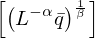

In [11]:
# define a new symbol ubar
qbar = symbols('qbar')
# explicitly solve for the isoquant curve: K as a function of qbar and L
isoquant_sol = solve(Eq(q, qbar), K)
# show the expression of the isoquant curve
isoquant_sol

Nice! Now we call this element (the solution we want): isoquant

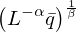

In [12]:
isoquant = isoquant_sol[0]
isoquant

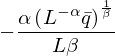

In [13]:
isoquant.diff(L).simplify()

## Plot isoquant curves

Let's plot multiple isoquant curves

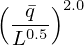

In [14]:
# set production function parameters for plotting
isoquant_plot = isoquant.subs([(alpha,0.5), (beta,0.5)])
isoquant_plot

In [15]:
isoquant_plot1 = plot(isoquant_plot.subs(qbar, 1), xlim=[0,10], ylim=[0,10], xlabel="$L$", ylabel="$K$", show=False)
isoquant_plot2 = plot(isoquant_plot.subs(qbar, 2), xlim=[0,10], ylim=[0,10], xlabel="$L$", ylabel="$K$", show=False)
isoquant_plot3 = plot(isoquant_plot.subs(qbar, 3), xlim=[0,10], ylim=[0,10], xlabel="$L$", ylabel="$K$", show=False)
isoquant_plot4 = plot(isoquant_plot.subs(qbar, 4), xlim=[0,10], ylim=[0,10], xlabel="$L$", ylabel="$K$", show=False)
isoquant_plot5 = plot(isoquant_plot.subs(qbar, 5), xlim=[0,10], ylim=[0,10], xlabel="$L$", ylabel="$K$", show=False)

Now, let's plot all 5 indifference curves in one graph!

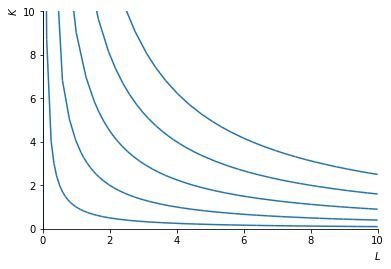

In [16]:
isoquant_plot_combo = isoquant_plot1
isoquant_plot_combo.extend(isoquant_plot2)
isoquant_plot_combo.extend(isoquant_plot3)
isoquant_plot_combo.extend(isoquant_plot4)
isoquant_plot_combo.extend(isoquant_plot5)
isoquant_plot_combo.show()

We can also change color of a particular curve with the 'line_color' method. 

For some choices of colors, see: https://www.w3schools.com/cssref/css_colors.asp

Be creative, have fun!

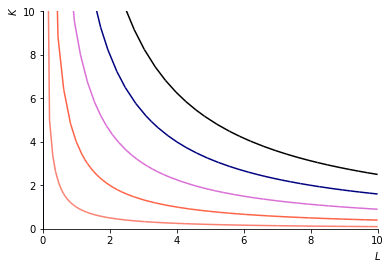

In [17]:
isoquant_plot_combo[0].line_color='salmon'
isoquant_plot_combo[1].line_color='tomato'
isoquant_plot_combo[2].line_color='orchid'
isoquant_plot_combo[3].line_color='navy'
isoquant_plot_combo[4].line_color='black'
isoquant_plot_combo.show()

## Questions and challenges

Q1. Given a CD production function $ q = L^{\alpha} K^{\beta} $, calculate average product of labor.

In [18]:
apl = (q/L).simplify()
apl

Q2. Impose values $\alpha = 0.5, \beta = 0.5, K=5$, then plot on the same graph:
1. total product of labor
2. average product of labor
3. marginal product of labor

In [19]:
q.subs([(alpha,0.5),(beta,0.5),(K,5)])

In [29]:
# impose specific values for plotting
tpl_SR_plot = q.subs([(alpha,0.5),(beta,0.5),(K,5)])
# calculate MP of labor
mpl_SR_plot = tpl_SR_plot.diff(L)
# calculate AP of labor
apl_SR_plot = tpl_SR_plot/L

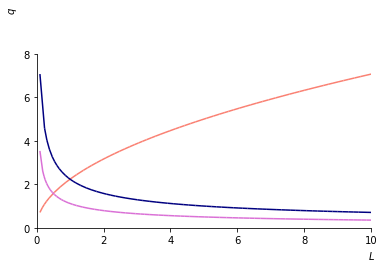

In [45]:
# create plots
tpl_plot = plot((tpl_SR_plot, (L,0.1,10)), xlim=[0,10], ylim=[0,10], xlabel="$L$", ylabel="$q$", show=False, line_color='salmon')
mpl_plot = plot((mpl_SR_plot, (L,0.1,10)), xlim=[0,10], ylim=[0,10], xlabel="$L$", ylabel="$q$", show=False, line_color='orchid')
apl_plot = plot((apl_SR_plot, (L,0.1,10)), xlim=[0,10], ylim=[0,10], xlabel="$L$", ylabel="$q$", show=False, line_color='navy')

# combine plots and show
product_plot_combo = tpl_plot
product_plot_combo.extend(mpl_plot)
product_plot_combo.extend(apl_plot)

product_plot_combo.show()

Q3. Choose different $\alpha$ values, repeat the plot, and compare against the plot in Q2 to investigate how the plot changes as $\alpha$ changes. 

Q4. Fixing $\alpha=0.5$, and choose different $\beta$ values, and compare against the plot in Q2 to investigate how the plot changes as $\beta$ changes. 

Is $MP_L$ affected by $\beta$? What's the intuition?